# Segmentation CNN

Here we are training a CNN to recognize if a letter is in the center of a 32x32 image. This will be used to locate letters in multi char CAPTCHAs

We have a dataset of 32x32 captcha images with one char, labeled if the char is in the middle or not. 

x : (468,000, 32, 32, 3)
y : (468,000, )  0 for uncentered, 1 otherwise

First we will preprocess the data. Our images are black and white, so we will colapse down to 1 color chanel. We will also normalize, shuffle, and make trainging splits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [2]:
x = np.load('data/x_single.npy')
y = np.load('data/y_single_pos.npy')

print(f"x shape: {x.shape}")
print(f'y shape: {y.shape}')

x shape: (468000, 32, 32, 3)
y shape: (468000,)


In [3]:
#Converting to greyscale
x = np.mean(x, axis=3)
print(x.shape)

(468000, 32, 32)


In [4]:
#Normalizing
x /= 256
print(f"max x : {np.max(x)}")
print(f"min y : {np.min(x)}")

max x : 0.99609375
min y : 0.0


In [5]:
#Shuffling
print("These should be different")
print(x[0,0,:])
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
x = x[idx, :, :]
y = y[idx]
print(x[0,0,:])
print(x.shape)
print(y.shape)



These should be different
[0.9140625  0.91796875 0.9140625  0.9140625  0.91796875 0.921875
 0.91796875 0.89453125 0.8359375  0.85546875 0.90625    0.9375
 0.953125   0.953125   0.95703125 0.9609375  0.96875    0.953125
 0.9375     0.94921875 0.90234375 0.78125    0.87890625 0.94140625
 0.875      0.87109375 0.890625   0.8671875  0.8828125  0.9375
 0.86328125 0.80078125]
[0.98828125 0.96875    0.93359375 0.8515625  0.765625   0.76953125
 0.7890625  0.86328125 0.8984375  0.89453125 0.9140625  0.94140625
 0.94140625 0.92578125 0.82421875 0.7890625  0.85546875 0.890625
 0.90234375 0.9375     0.96484375 0.91796875 0.86328125 0.80078125
 0.79296875 0.83984375 0.82421875 0.78515625 0.86328125 0.921875
 0.84375    0.796875  ]
(468000, 32, 32)
(468000,)


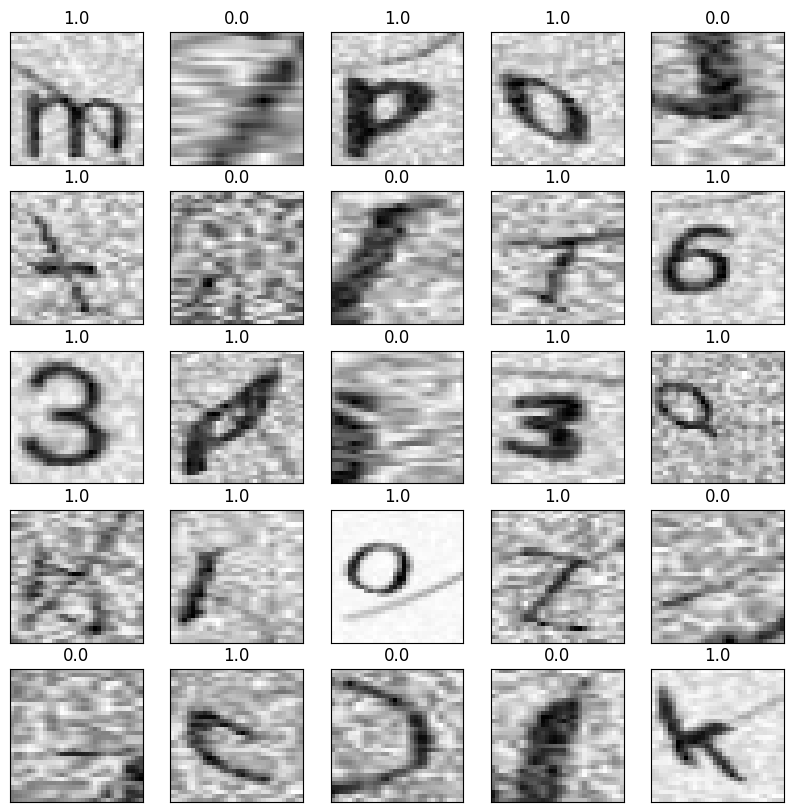

In [6]:
fig, axs = plt.subplots(5,5)
N = x.shape[0]
fig.set_size_inches(10,10)
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        idx = np.random.randint(N)
        ax.imshow((x[idx,:,:]), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(y[idx])
plt.show()

In [18]:
x = np.squeeze(x)
print(x.shape)

(468000, 32, 32)


In [19]:
#We need to have a singlton dim for chans dimention
if(len(x.shape) == 3):
    x = x[:, None, :, :]
print(x.shape)
np.save('data/x_single_preprocessed.npy', x)
np.save('data/y_single_pos_preprocessed.npy', y)
print("Preprocessed data saved to disk")

(468000, 1, 32, 32)
Preprocessed data saved to disk


In [20]:
#Splitting the data in to test and training sets. Going with a 80/20 
#Also getting dev sets for debugging and tuning hyper parameters.

split_idx = int(N * 0.8)
test_split = 3000
x_train = x[:split_idx,:, :, :] 
x_val = x[split_idx:-test_split, :, :, :]
x_test = x[-test_split:, :, :, :]
x_train_dev = x[:3000, :, :, :]
x_val_dev = x[split_idx:split_idx+500, :, :, :]

y_train = y[:split_idx] 
y_val = y[split_idx:-test_split]
y_test = y[-test_split:]
y_train_dev = y[:3000]
y_val_dev = y[split_idx:split_idx+500]

dataset = (x_train, x_val, x_test, x_train_dev, x_val_dev, y_train, y_val, y_test, y_train_dev, y_val_dev)

for datum in dataset:
    print(datum.shape)


(374400, 1, 32, 32)
(90600, 1, 32, 32)
(3000, 1, 32, 32)
(3000, 1, 32, 32)
(500, 1, 32, 32)
(374400,)
(90600,)
(3000,)
(3000,)
(500,)


# CNN Training

Reusing network from project 3. 

In [22]:
from CNN.network import ConvNet4Accel

ModuleNotFoundError: No module named 'CNN.im2col_cython'

In [76]:
optimizer = 'adam'
lr = 1e-2
img_sz = (1, 32, 32)
n_kers = (32,)
ker_sz = (7,)
dense_units=(100,)
pooling_sz = (2,)
pooling_strides = (2,)
n_classes = 2
wt_scale=1e3
reg=0
verbose = True

mini_size = 100
n_epochs = 10
acc_freq=10
print_every = 50


adam_net = ConvNet4Accel(img_sz, n_kers, ker_sz, dense_units, pooling_sz, pooling_strides, n_classes, wt_scale, reg, verbose)
adam_net.compile(optimizer, lr)
loss_hist = adam_net.fit(x_train_dev, y_train_dev, x_val_dev, y_val_dev, mini_size, n_epochs, acc_freq, print_every)


AttributeError: module 'CNN.layer' has no attribute 'Conv2DAccel'